In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter, defaultdict
import spacy
import numpy as np
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

ps = nltk.PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings("ignore")

import os
stop=set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/hasana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hasana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
data = pd.read_csv('../data/tweet_data.csv')

In [13]:

null= data.isnull().sum().sort_values(ascending=False)
total =data.shape[0]
percent_missing= (data.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0     Location          47973         0.959441
1     HashTags              4         0.000080
2   Unnamed: 0              0         0.000000
3         Date              0         0.000000
4         User              0         0.000000
5        Tweet              0         0.000000


Text(0.5, 1.0, 'Distributions of Characters lengths in tweets')

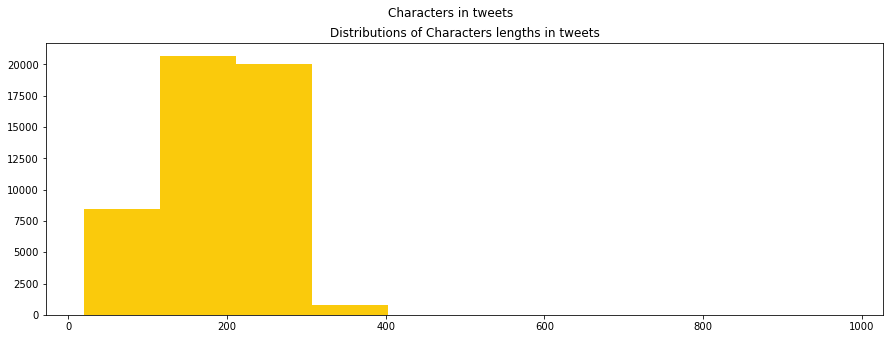

In [14]:
fig,ax =plt.subplots(1,1, figsize=(15,5))
tweet_len=data['Tweet'].str.len()
ax.hist(tweet_len,color='#FACA0C')
fig.suptitle('Characters in tweets')
ax.set_title('Distributions of Characters lengths in tweets')

### Number of words in a tweet

Text(0.5, 1.0, 'Distributions of Words length in tweets')

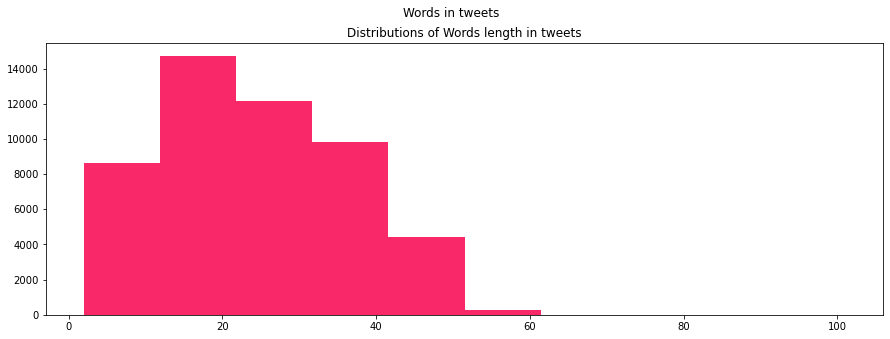

In [15]:
fig,ax =plt.subplots(1,1, figsize=(15,5))
tweet_len=data['Tweet'].str.split().map(lambda x: len(x))

ax.hist(tweet_len,color='#F92969')
fig.suptitle('Words in tweets')
ax.set_title('Distributions of Words length in tweets')

### Average word length in a tweet

<AxesSubplot:xlabel='Tweet', ylabel='Density'>

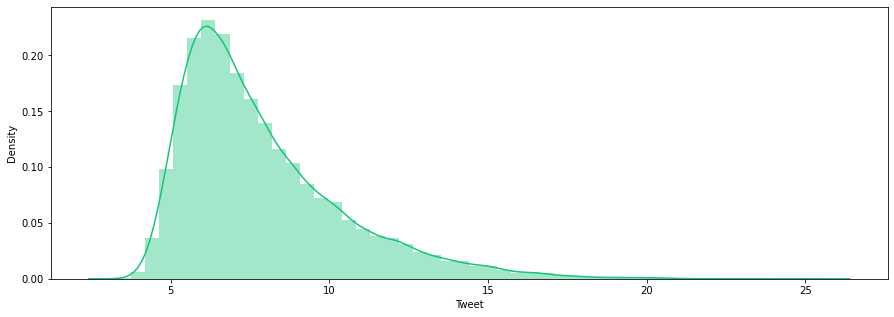

In [16]:
fig,ax =plt.subplots(1,1, figsize=(15,5))
word=data['Tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax,color='#17C37B')

### Common Stopwords in the tweets

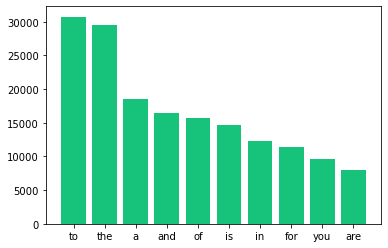

In [17]:
def create_corpus(target):
    corpus=[]
    
    for x in data['Tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

    from collections import defaultdict,Counter
corpus=create_corpus("positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B');

### Puntctuations

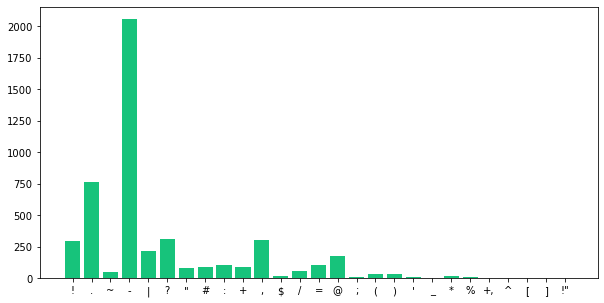

In [18]:
plt.figure(figsize=(10,5))
corpus=create_corpus("positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B');

### Common Words

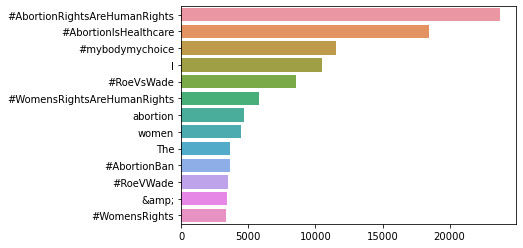

In [19]:

counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x);

### Hashtags and Mentions

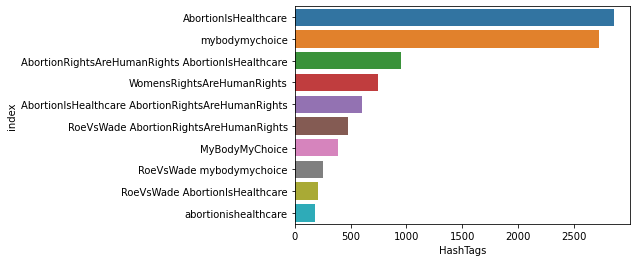

In [22]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
data['HashTags']=data['Tweet'].apply(lambda x:find_hash(x))

temp_new =data['HashTags'].value_counts()[:][1:11].to_frame().reset_index()
sns.barplot(y="index",x="HashTags", data = temp_new);

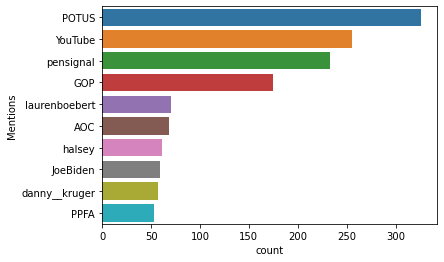

In [23]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
data['mentions']=data['Tweet'].apply(lambda x:mentions(x))

temp=data['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(y="Mentions",x="count", data = temp);

### Bigram

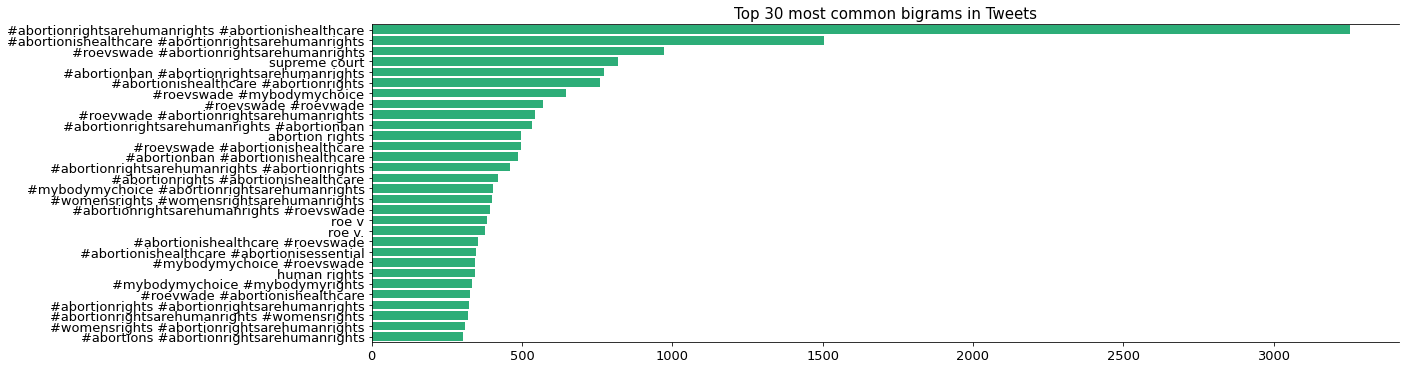

In [26]:
# Bigrams
bigrams = defaultdict(int)
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30

for tweet in data['Tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        bigrams[word] += 1
        
df_bigrams = pd.DataFrame(sorted(bigrams.items(), key=lambda x: x[1])[::-1])
fig,ax =plt.subplots(1,1, figsize=(15,5))
plt.tight_layout()

sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], ax=ax, color='#17C37B')
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title(f'Top {N} most common bigrams in Tweets', fontsize=15)

plt.show()

### Trigram

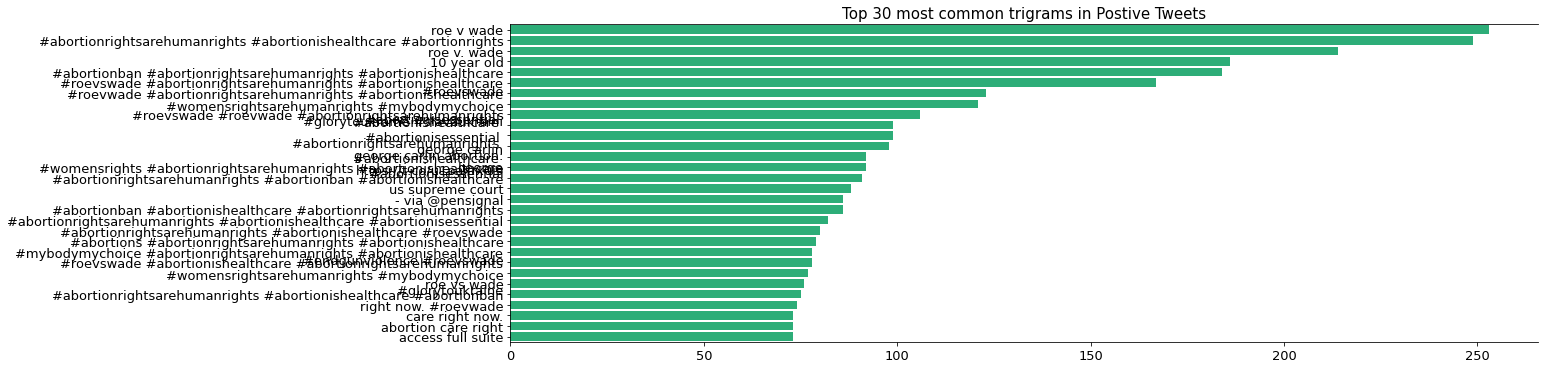

In [28]:
# Triigrams
trigrams = defaultdict(int)

for tweet in data['Tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        trigrams[word] += 1
        
df_trigrams = pd.DataFrame(sorted(trigrams.items(), key=lambda x: x[1])[::-1])
fig,ax =plt.subplots(1,1, figsize=(15,5))
plt.tight_layout()

sns.barplot(y=df_trigrams[0].values[:N], x=df_trigrams[1].values[:N], ax=ax, color='#17C37B')
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)

plt.show()

### Users

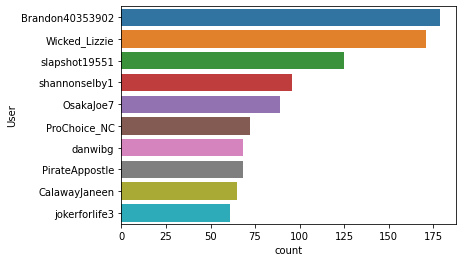

In [36]:

temp=data['User'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'User','User':'count'})
temp
sns.barplot(y="User",x="count", data = temp);